In [1]:
import os
import urllib
import cv2
import numpy as np
from pixellib.semantic import semantic_segmentation
from matplotlib import pyplot as plt

# 1. Image load

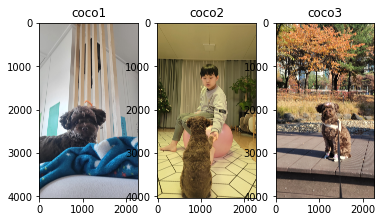

In [2]:
img_path1= os.getenv('HOME')+'/aiffel/human_segmentation/images/coco1.png'  
img_path2 = os.getenv('HOME')+'/aiffel/human_segmentation/images/coco2.png'  
img_path3 = os.getenv('HOME')+'/aiffel/human_segmentation/images/coco3.png'  

img_orig1 = cv2.imread(img_path1) 
img_orig2= cv2.imread(img_path2) 
img_orig3= cv2.imread(img_path3) 

titles = ['coco1', 'coco2', 'coco3']
images = [img_orig1, img_orig2, img_orig3]


for i in range(3):
    plt.subplot(1,3,i+1)
    plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
    plt.title(titles[i])


# 2. Segmentation

In [3]:
model_dir = os.getenv('HOME')+'/aiffel/human_segmentation/models' 
model_file = os.path.join(model_dir, 'deeplabv3_xception_tf_dim_ordering_tf_kernels.h5') 
model_url = 'https://github.com/ayoolaolafenwa/PixelLib/releases/download/1.1/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5' 

# model download
urllib.request.urlretrieve(model_url, model_file) 

('/aiffel/aiffel/human_segmentation/models/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5',
 <http.client.HTTPMessage at 0x7ff7b1838310>)

In [4]:
model = semantic_segmentation() 
model.load_pascalvoc_model(model_file) 
# pascal voc에 대해 훈련된 예외 모델(model_file)을 로드하는 함수를 호출

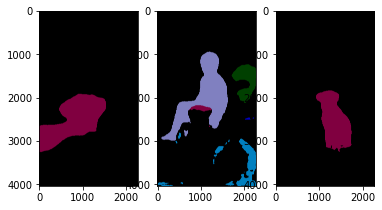

In [5]:
segvalues1, output1 = model.segmentAsPascalvoc(img_path1) 
segvalues2, output2 = model.segmentAsPascalvoc(img_path2) 
segvalues3, output3 = model.segmentAsPascalvoc(img_path3) 

segvalues_list=[segvalues1, segvalues2, segvalues3]
output_list=[output1, output2, output3]

for i in range(3):
    plt.subplot(1,3, i+1)
    plt.imshow(output_list[i])
    

In [6]:
#pascalvoc 데이터의 라벨종류
LABEL_NAMES = [
    'background', 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus',
    'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike',
    'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tv'
]
len(LABEL_NAMES)

21

In [7]:
for i in range(3):
    print(segvalues_list[i])
   
    for class_id in segvalues_list[i]['class_ids']:
        print(LABEL_NAMES[class_id])


{'class_ids': array([ 0, 12]), 'masks': array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])}
background
dog
{'class_ids': array([ 0,  9, 11, 12, 15, 16]), 'masks': array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ...,  True,  True,  True],
       [False, False, False, ...,  True,  True,  True],
       [False, False, False, ...,  True,  True,  True]])}
background
chair
diningtable
dog
person
pottedplant
{'class_ids': array([ 0, 12]), 'masks': array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, 

In [8]:
#컬러맵 만들기 
colormap = np.zeros((256, 3), dtype = int)
ind = np.arange(256, dtype=int)

for shift in reversed(range(8)):
    for channel in range(3):
        colormap[:, channel] |= ((ind >> channel) & 1) << shift
    ind >>= 3

colormap[:20] #생성한 20개의 컬러맵 출력

array([[  0,   0,   0],
       [128,   0,   0],
       [  0, 128,   0],
       [128, 128,   0],
       [  0,   0, 128],
       [128,   0, 128],
       [  0, 128, 128],
       [128, 128, 128],
       [ 64,   0,   0],
       [192,   0,   0],
       [ 64, 128,   0],
       [192, 128,   0],
       [ 64,   0, 128],
       [192,   0, 128],
       [ 64, 128, 128],
       [192, 128, 128],
       [  0,  64,   0],
       [128,  64,   0],
       [  0, 192,   0],
       [128, 192,   0]])

In [9]:
colormap[15] # person

array([192, 128, 128])

In [10]:
colormap[12] # dog

array([ 64,   0, 128])

In [11]:
seg_color1 = (128,128,192) # person
seg_color2 = (128,0,64) # dog

## masking

(4032, 2268)
(4032, 2268)
(4032, 2268)


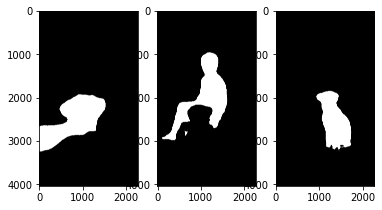

In [12]:
seg_map1 = np.all(output1==seg_color2, axis=-1) 
seg_map2 = np.all(output2==seg_color1, axis=-1) 
seg_map3 = np.all(output3==seg_color2, axis=-1) 
seg_map_list = [seg_map1, seg_map2, seg_map3]

print(seg_map1.shape) 
print(seg_map2.shape) 
print(seg_map3.shape)

for i in range(3):
    plt.subplot(1,3, i+1)
    plt.imshow(seg_map_list[i], cmap='gray')


In [13]:
seg_map_list[2]

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

# 3. masking한 person img에 색을 입혀 원본과 합성

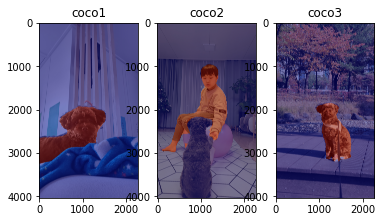

In [14]:
img_show1 = img_orig1.copy()
img_show2 = img_orig2.copy()
img_show3 = img_orig3.copy()


# True과 False인 값을 각각 255과 0으로 바꿔줍니다
img_mask1 = seg_map1.astype(np.uint8) * 255
img_mask2 = seg_map2.astype(np.uint8) * 255
img_mask3 = seg_map3.astype(np.uint8) * 255
# img_mask_list= [img_mask1, img_mask2, img_mask3]

# 255와 0을 적당한 색상으로 바꿔봅니다
color_mask1 = cv2.applyColorMap(img_mask1, cv2.COLORMAP_JET)
color_mask2 = cv2.applyColorMap(img_mask2, cv2.COLORMAP_JET)
color_mask3 = cv2.applyColorMap(img_mask3, cv2.COLORMAP_JET)
# color_mask_list = [color_mask1, color_mask2, color_mask3]

# 원본 이미지와 마스크를 적당히 합쳐봅니다
# 0.6(img_show-origin)과 0.4(color_mask)는 두 이미지를 섞는 비율입니다.
img_show1 = cv2.addWeighted(img_show1, 0.5, color_mask1, 0.5, 0.0)
img_show2 = cv2.addWeighted(img_show2, 0.5, color_mask2, 0.5, 0.0)
img_show3 = cv2.addWeighted(img_show3, 0.5, color_mask3, 0.5, 0.0)

# list
seg_map_list = [seg_map1, seg_map2, seg_map3]
images = [img_orig1, img_orig2, img_orig3]
img_show_list= [img_show1, img_show2, img_show3]
img_mask_list= [img_mask1, img_mask2, img_mask3]
seg_map_list = [seg_map1, seg_map2, seg_map3]
color_mask_list = [color_mask1, color_mask2, color_mask3]

for i in range(3):
    plt.subplot(1,3,i+1)
    plt.imshow(cv2.cvtColor(img_show_list[i], cv2.COLOR_BGR2RGB))
    plt.title(titles[i])


## Image blurring

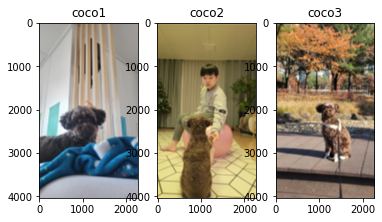

In [15]:
img_orig_blur1 = cv2.blur(img_orig1, (40,40))
img_orig_blur2 = cv2.blur(img_orig2, (40,40))
img_orig_blur3 = cv2.blur(img_orig3, (40,40))

img_orig_blur_list = [img_orig_blur1, img_orig_blur2, img_orig_blur3]

for i in range(3):
    plt.subplot(1,3,i+1)
    plt.imshow(cv2.cvtColor(img_orig_blur_list[i], cv2.COLOR_BGR2RGB))
    plt.title(titles[i])


## blur 처리한 Image 분리

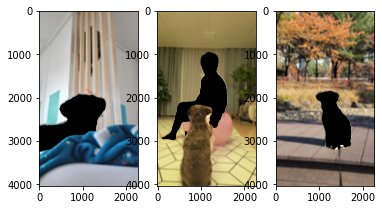

In [16]:
img_mask_color1 = cv2.cvtColor(img_mask1, cv2.COLOR_GRAY2BGR)
img_bg_mask1 = cv2.bitwise_not(img_mask_color1)
img_bg_blur1 = cv2.bitwise_and(img_orig_blur1, img_bg_mask1)

img_mask_color2 = cv2.cvtColor(img_mask2, cv2.COLOR_GRAY2BGR)
img_bg_mask2 = cv2.bitwise_not(img_mask_color2)
img_bg_blur2 = cv2.bitwise_and(img_orig_blur2, img_bg_mask2)

img_mask_color3 = cv2.cvtColor(img_mask3, cv2.COLOR_GRAY2BGR)
img_bg_mask3 = cv2.bitwise_not(img_mask_color3)
img_bg_blur3 = cv2.bitwise_and(img_orig_blur3, img_bg_mask3)

img_bg_blur_list = [img_bg_blur1, img_bg_blur2, img_bg_blur3]

for i in range(3):
    plt.subplot(1,3,i+1)
    plt.imshow(cv2.cvtColor(img_bg_blur_list[i], cv2.COLOR_BGR2RGB))
    

## 합성

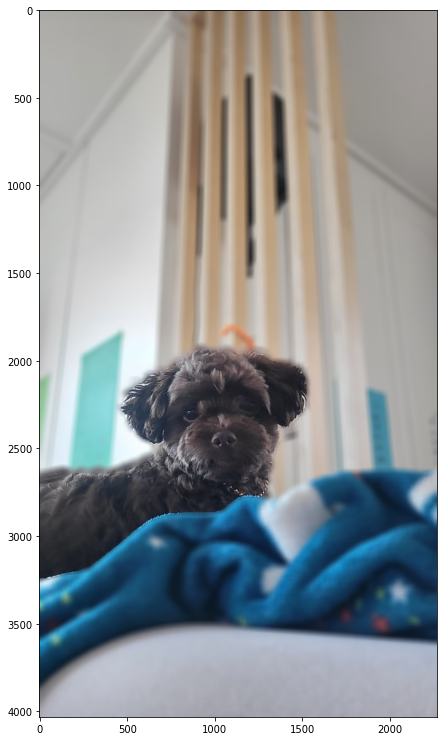

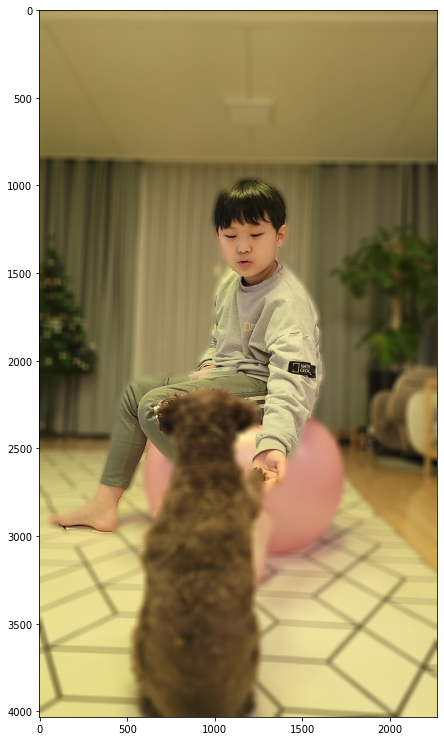

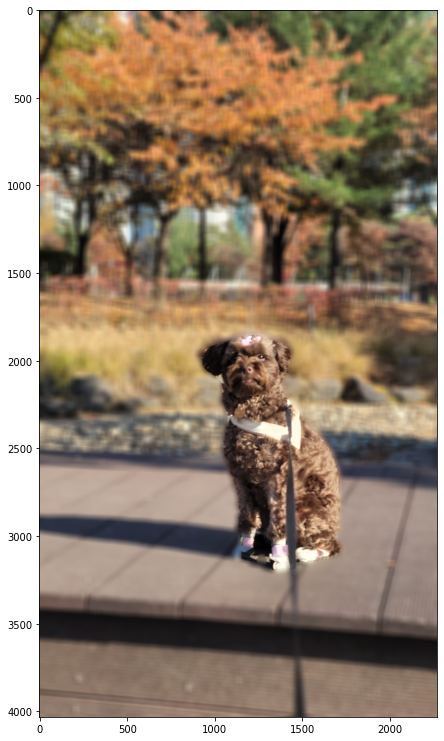

In [24]:
img_concat1 = np.where(img_mask_color1==255, img_orig1, img_bg_blur1)
img_concat2 = np.where(img_mask_color2==255, img_orig2, img_bg_blur2)
img_concat3 = np.where(img_mask_color3==255, img_orig3, img_bg_blur3)

img_concat_list = [img_concat1, img_concat2, img_concat3]

for i in range(3):
    plt.figure(figsize=(15, 13))
    plt.imshow(cv2.cvtColor(img_concat_list[i], cv2.COLOR_BGR2RGB))


In [18]:
# 회고
    문제점)
    1. object가 배경에가려 연결되지 않은 부분은 검출하지 못했음
       (예, 두번째 사진의 아이 왼쪽발은 강아지에 가려져 target object로 고려되지 않았음)
    2. 강아지신발을 완전히 검출하지 못했음.. (일반적이지 않은 예외 상황에 대한 검출실패)
    3. Detection한 object와의 경계가 완전하지 않음
    
    해결방안1) - segmentation 경계 해상도 높이기
    1. object의 경계를 정확하게 예측하기위한 예로, 세포단위를 검출하는 의료 영상에서와 같이 
       경계를 명확히 추론해내기위해 이미지간의 경계의 손실에 더 많은 페널티를 부과하여 경계를
        좀더 sharp하게 다듬을 수 있지 않을까요? (아래 참고 link에서는U-Net 의 tile방식을 이용해
        이미지를 추론하여 높은 해상도의 segmentation 맵을 얻을 수 있도록 함)
        
    참고) https://velog.io/@xpelqpdj0422/7.-%EB%AC%BC%EC%B2%B4%EB%A5%BC-%EB%B6%84%EB%A6%AC%ED%95%98%EC%9E%90-Segmentation-%EC%95%8C%EC%95%84%EB%B3%B4%EA%B8%B0
    
    해결방안2) - 미제사건
    2. 이미지가 가려져 분리되었을 경우 동일 물체로 인식할 수 있게 하는 방안은...??? 

![coco2_comment](coco2_comment.png)

![coco2_comment](coco3_comment.png)